In [ ]:

import tensorflow as tf

import seaborn as sns


In [2]:
tf.device('/GPU:0') if tf.config.list_physical_devices('GPU') else tf.device('/CPU:0')

2022-12-14 18:09:19.016747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loading -           "MNIST Data Set"
## Containing Training Samples = 60000        , Testing Samples = 10000
### Tensorflow already contain MNIST data set which can be loaded using Keras

In [3]:
mnist = tf.keras.datasets.mnist       ## this is basically handwrtten characters based on 28 x 28 sized images of 0 and 9

## After loading the MNIST data, Divide into train and test Datasets

In [38]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [39]:
x_train.shape


(60000, 28, 28)

In [40]:

import matplotlib.pyplot as plt

/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

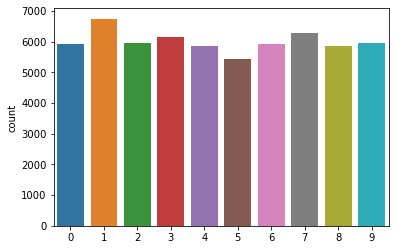

In [41]:
sns.countplot(y_train)

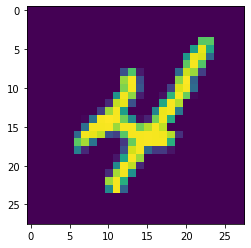

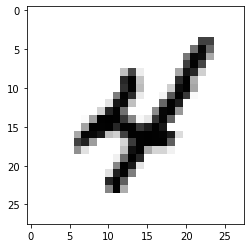

In [42]:
# just checking how data looks like
plt.imshow(x_train[9])
plt.show()      # in order to execute graph
## however we dont know whether its color image or binary image

## so inorder to plot it change the configuration

plt.imshow(x_train[9], cmap = plt.cm.binary)

## Checking the values of each pixel
## Before Normalization

In [43]:
print(x_train[0])    #before normalization
# 0 represnts black and 255 represents white

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in Gray level (1 channel ==> 0 to 255), not colored (RGB)

# Normalizing the data | Pre - Processing step

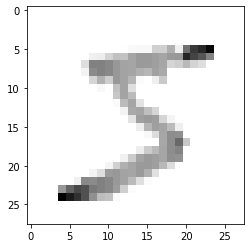

In [44]:
### you might have noticed that its gray image and all values varies from 0 to 255
### in order to normalize it  or we can do it by doing x_train/255.0

x_train = tf.keras.utils.normalize(x_train , axis =1)
x_test = tf.keras.utils.normalize(x_test,axis =1)
plt.imshow(x_train[0],cmap = plt.cm.binary)

## After Normalization

In [45]:
print(x_train[0])   ## all values are normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
print(y_train[0])     ## just to check that we have labels inside our network

5


## Resizing image to make it suitable fot apply Convolution 

In [48]:
import numpy as np
IMG_SIZE =28

In [49]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)  ## increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(10000, IMG_SIZE, IMG_SIZE,1)  ## increasing one dimension for kernel operation

print("Training Samples dimension ", x_trainr.shape)
print("Testing Samples dimension ", x_testr.shape)

Training Samples dimension  (60000, 28, 28, 1)
Testing Samples dimension  (10000, 28, 28, 1)


In [50]:
# from keras.utils import to_categorical

# y_train = to_categorical(y_train)

In [51]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False
)
datagen.fit(x_trainr)

In [52]:
x_trainr.shape

(60000, 28, 28, 1)

# Creating a Deep Neural Network

### Training on 60,000 samples of MNIST handwritten dataset

In [53]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [54]:
### Creating a neural network now
model = Sequential()

### First Convolution layer
model.add(Conv2D(32,(5,5),padding = 'Same',input_shape= x_trainr.shape[1:]))    ## only for first convolution layer to mention input layer size
model.add(Activation("relu"))   ## activation function to make it non-linear <0 reomve >0
model.add(Conv2D(32,(5,5),padding = 'Same'))    ## only for first convolution layer to mention input layer size
model.add(Activation("relu"))   ## activation function to make it non-linear <0 reomve >0
model.add(MaxPooling2D(pool_size= (2,2)))    ## Max Pooling single maximum value of 2X2
model.add(Dropout(0.25))



### Second Convolution layer
model.add(Conv2D(64,(3,3),padding = 'Same'))    ## 2nd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(Conv2D(64,(3,3),padding = 'Same'))    ## 2nd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2))) 
model.add(Dropout(0.25))

### Third Convolution layer
model.add(Conv2D(64,(3,3),padding = 'Same'))    ## 3rd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(Conv2D(64,(3,3),padding = 'Same'))    ## 3rd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2))) 


## Fullly connected layer #1
model.add(Flatten())     ### Before using fully connected layer , need to be flatten so that 2D to 1 D
model.add(Dropout(0.25))
# model.add(Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.35))


# ## Fullly connected layer #2
model.add(Dense(32))     
model.add(Activation("relu"))

## Last Fullly connected layer #3, output must be equal to number of classes , 10(0-9)
model.add(Dense(10))     
model.add(Activation("softmax"))  ## class probabilities

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 activation_8 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_9 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                      

In [55]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [56]:
print("Total training samples = ", len(x_trainr))

Total training samples =  60000


In [57]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt , metrics = ['accuracy'])

In [58]:
x_trainr.shape


(60000, 28, 28, 1)

In [62]:
model.fit(datagen.flow(x_trainr, y_train, batch_size =64 ),epochs = 5, verbose =1)



Epoch 1/5
938/938 [==============================] - 419s 447ms/step - loss: 0.3127 - accuracy: 0.9025
Epoch 2/5
938/938 [==============================] - 369s 393ms/step - loss: 0.1026 - accuracy: 0.9683
Epoch 3/5
938/938 [==============================] - 314s 335ms/step - loss: 0.0731 - accuracy: 0.9780
Epoch 4/5
938/938 [==============================] - 319s 340ms/step - loss: 0.0650 - accuracy: 0.9807
Epoch 5/5
938/938 [==============================] - 316s 337ms/step - loss: 0.0569 - accuracy: 0.9828


In [63]:
from keras.models import load_model
model.save('mymodel.h5')
# model = load_model('mymodel.h5')

In [64]:
## if validation accauracy< accuracy.  , it means overfitting you can use droput layer

In [65]:
test_loss , test_acc = model.evaluate(x_testr, y_test,verbose = 0)
print("Test loss on 10000 samples" , test_loss)
print("Validation accuracy on 10000 samples", test_acc)

Test loss on 10000 samples 0.021265268325805664
Validation accuracy on 10000 samples 0.9927999973297119


In [66]:
predictions = model.predict([x_testr])

313/313 [==============================] - 11s 34ms/step


In [67]:
print(predictions)

[[3.8613003e-08 3.2814387e-07 4.4350700e-06 ... 9.9998724e-01
  3.8188926e-08 6.3717785e-06]
 [6.9425579e-07 1.0834792e-06 9.9999642e-01 ... 1.0439741e-06
  5.1458041e-08 3.6712962e-08]
 [3.1010239e-07 9.9986184e-01 2.5206086e-06 ... 4.0903997e-06
  6.0901634e-06 2.6963280e-06]
 ...
 [1.9694983e-10 3.7427392e-07 2.6939809e-08 ... 1.0789301e-07
  1.4490775e-05 3.6360714e-06]
 [5.0582383e-09 9.4098784e-11 9.4256859e-11 ... 1.1471675e-12
  3.1853575e-05 7.7293869e-09]
 [3.0598618e-05 1.9212308e-07 1.0017990e-05 ... 2.2053449e-10
  7.7701967e-05 2.5650954e-06]]


In [68]:
## in order to understand convert the predictions from one hot encoding , we need to use numpy for that

print(np.argmax(predictions[12]))    ## so actually argmax will return the maximum value index and find the value

9


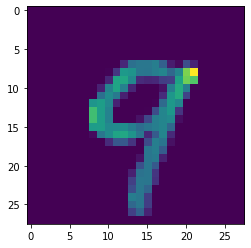

In [70]:
plt.imshow(x_test[12])

In [71]:
import cv2
import matplotlib.pyplot as plt


In [72]:
from keras.models import load_model
model= load_model('mymodel.h5')

In [335]:
img = cv2.imread('seven4.png')

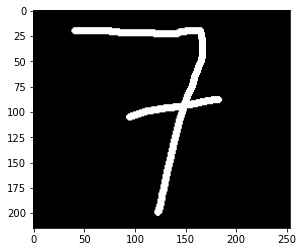

In [336]:
plt.imshow(img)

In [337]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

(215, 254)


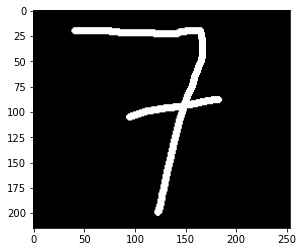

In [338]:
resized.shape

plt.imshow(img)

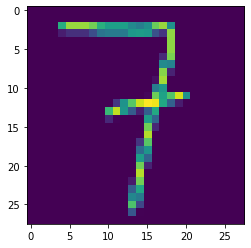

In [339]:
## need to normalize
newimg = tf.keras.utils.normalize(resized, axis =1)

newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

newimg.shape

plt.imshow(resized)

In [340]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 29ms/step


In [341]:
print(np.argmax(predictions))

7


In [ ]:

#     img = np.random.randint(10, size=(h,w))
#     fig.add_subplot(i,2,1)
#     plt.imshow(img)
# plt.show()

2  9  20  26  53  58  60  61  64  89  92  

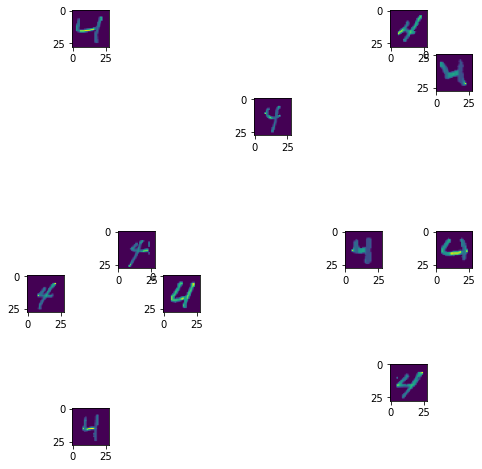

In [376]:

fig = plt.figure(figsize=(8, 8))
for i in range(0,100):
    if(y_train[i] == 4 ):
        fig.add_subplot(10,10, i)

        plt.imshow(x_train[i])
        print(i,end = "  ")
        
     
    